In [40]:
import os
import sys
import argparse
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


#         for run_name in ["bf", "gd"]:
        for run_name in ["gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name:
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads/result/workload_1/gd/5_5
10.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 14.pkl
[success]
16.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 16.pkl
[success]
18.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 18.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 2.pkl
[success]
20.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 20.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 24.pkl
[success]
26.pkl
[load output] ../../wo

gd_5_5


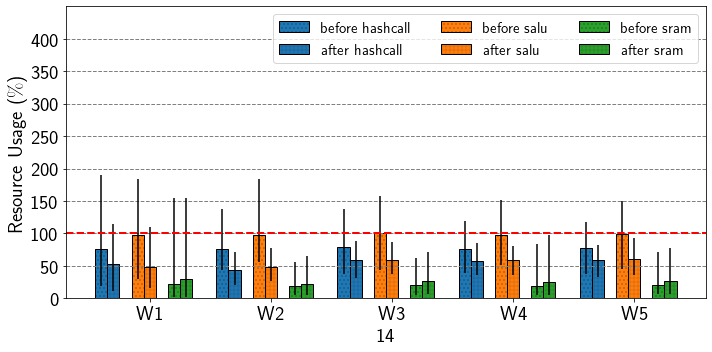

gd_5_5


<Figure size 432x288 with 0 Axes>

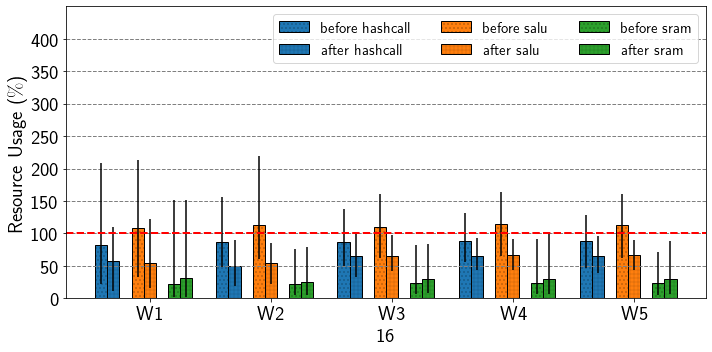

gd_5_5


<Figure size 432x288 with 0 Axes>

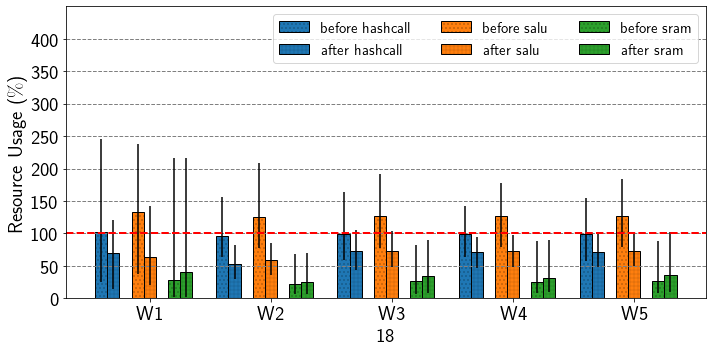

<Figure size 432x288 with 0 Axes>

In [46]:
import numpy as np

def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'
width = 0.1
colors = ['C0', 'C0', 'C1', 'C1', 'C2', 'C2']
run_name = "gd_5_5"
key_list = [i*2 for i in range(1, 16)]
for key in [14, 16, 18]:
# for key in key_list:
#     fig, ax = plt.subplots(figsize=(5, 3))
    xaxis_title = str(key)
    print(run_name)
    result = {}
    min_result = {}
    max_result = {}
    for resource in ["hashcall", "salu", "sram"]:
        result[resource] = {}
        result[resource]["before"] = []
        result[resource]["after"] = []

        min_result[resource] = {}
        min_result[resource]["before"] = []
        min_result[resource]["after"] = []

        max_result[resource] = {}
        max_result[resource]["before"] = []
        max_result[resource]["after"] = []
        
    fig, ax = plt.subplots(figsize=(10, 5))
    workload_list = ["W1", "W2", "W3", "W4", "W5"]

#     xlabel = [0, 1, 2, 3, 4]
    xlabel = np.arange(5)
    
    for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
        df = data[workload][run_name][key]["avg_resource"]
        for resource in ["hashcall", "salu", "sram"]:
            result[resource]["before"].append(df["before"][resource])
            min_result[resource]["before"].append(df["before"][resource] - df["before_min"][resource])
            max_result[resource]["before"].append(df["before_max"][resource] - df["before"][resource])

            result[resource]["after"].append(df["after"][resource])
            min_result[resource]["after"].append(df["after"][resource] - df["after_min"][resource])
            max_result[resource]["after"].append(df["after_max"][resource] - df["after"][resource])


    i = 0

    for individual_resource, offset in zip(["hashcall", "salu", "sram"], [-3, 0, 3]):
        ax.bar(xlabel+(offset-1)*width, result[individual_resource]["before"], width, label="before " + individual_resource,
            hatch='...', color=colors[i], edgecolor='black', yerr=[min_result[individual_resource]["before"], max_result[individual_resource]["before"]])

        ax.bar(xlabel+offset*width, result[individual_resource]["after"], width, label="after " + individual_resource,
               hatch='+++',color=colors[i+1], edgecolor='#000000', yerr=[min_result[individual_resource]["after"], max_result[individual_resource]["after"]])
        i += 2

    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    # fig.canvas.draw()
    # ax.set_title(individual_resource + ' Usage ($\\%$) before vs after', fontsize=30)
    ax.set_xticks(np.arange(len(workload_list)))
    ax.set_xticklabels(workload_list, fontsize=20)
    ax.set_xlabel(xaxis_title, fontsize=20)
    ax.set_yticks(np.arange(0, 450, step=50))
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel('Resource  Usage ($\\%$)', fontsize=20)
    ax.set_ylim([0, 450])
    ax.legend(ncol=3, fontsize=15)
    ax.axhline(y=100, color='red', linestyle="--", linewidth=2)
    # ax.legend(ncol=2, frameon=True, loc='best', borderaxespad=0.1,
    # handlelength=0.6, handletextpad=0.2, columnspacing=0.3, fontsize=20,
    # framealpha=0.5)
    ax.minorticks_off()
    plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    plt.tight_layout()
#     plt.savefig("beforeafter.png", format="png", bbox_inches='tight')
    plt.show()
    plt.clf()
        
    
